In [1]:
from windIO.Plant import WTLayout

In [2]:
wtl = WTLayout('lillgrund.yml')

In [5]:
import matplotlib.pylab as pl
%matplotlib inline

#### Plot the layout of the wind farm

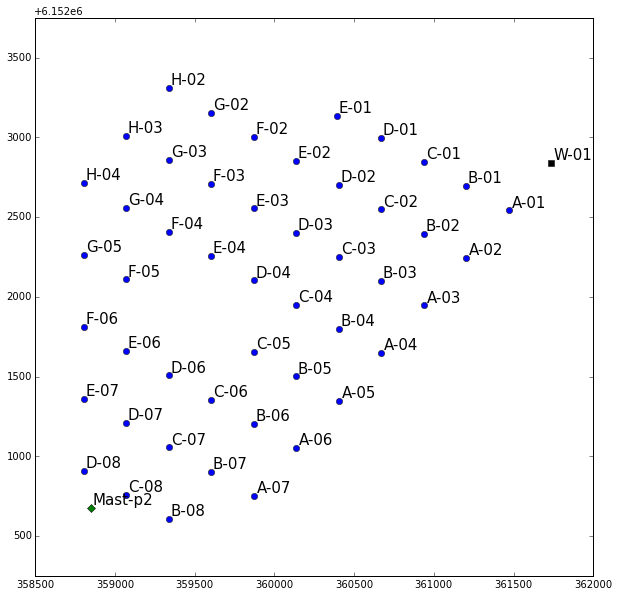

In [32]:
pl.figure(figsize=[10, 10]);
fontsize = 15
off = 20
for tobj, prop in zip(['turbines', 'metmasts', 'transformers'], 
                      ['ob',       'Dg',       'sk']):
    for nm, vm in wtl[tobj].items():
        pos = vm['position']
        pl.plot(pos[0], pos[1], prop)
        pl.text(pos[0]+off, pos[1]+off, vm['name'], fontsize=fontsize)
pl.axis('equal');

#### Accessing the turbine type

In [ ]:
wtl['turbines']['']

#### Plot the turbine characteristics

(-10.0, 20.0, 0.0, 120.0)

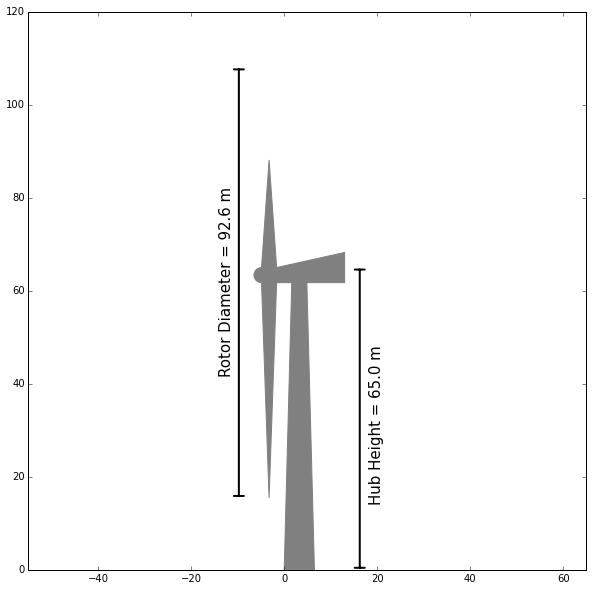

In [172]:
from matplotlib.patches import Polygon, Circle, FancyArrowPatch
import numpy as np

def plot_turbine(pos, turbine_type, figure, fontsize=14, legend=False):
    color = 'gray'
    HH = turbine_type['hub_height']
    TB = HH/10.
    RD = turbine_type['rotor_diameter']

    fact = np.array([TB, HH])
    A = np.array([pos, 0.])
    B = A + [1., 0.]
    C = B + [-0.25, 0.95]
    D = C + [-0.5, 0.]
    tower = Polygon(np.array([A,B,C,D]) * fact, color=color)

    E = A + [-0.25, 0.95]
    F = E + [2.25, 0.0]
    G = F + [0., 0.1]
    H = E + [0., 0.05]
    I = H + [-0.5, 0.]
    J = E + [-0.5, 0.]
    nacelle = Polygon(np.array([E, F, G, H, I, J]) * fact, color=color)


    K = (I + J)/2.0
    hub = Circle(K * fact, radius=(I[1]-J[1])/2.0 * fact[1], color=color)

    L = (J+E)/2. + [0., -0.5*RD/HH]
    M = (I+H)/2. + [0., +0.5*RD/HH*np.sin(-np.pi/2.0+2*np.pi/3.)]
    blade1 = Polygon(np.array([J,E,L]) * fact, color=color)
    blade2 = Polygon(np.array([I,H,M]) * fact, color=color)

    # Plotting the patches
    ax1 = fig1.add_subplot(111, aspect='equal')
    for p in [tower, nacelle, hub, blade1, blade2]:
        ax1.add_patch(p)

    # Plotting the control points
    #for name in 'ABCDEFGHIJKLM':
    #    p = eval(name)*fact
    #    pl.plot(p[0], p[1], 'ob', alpha=0.5)
    #    pl.text(p[0], p[1], name, fontsize=fontsize)

    if legend:
        # Plotting the rotor diam
        ax1.add_patch(FancyArrowPatch((L + [-1., 0.])*fact, (L + [-1., 0.])*fact + [0., RD], arrowstyle='|-|', mutation_scale=5.0,
                                     linewidth=2.))
        N = K + [-1.4, 0.25]
        pl.text(N[0]*fact[0], N[1]*fact[1], 'Rotor Diameter = {} m'.format(RD), fontsize=fontsize, rotation=90)

        # Plotting the hub height
        ax1.add_patch(FancyArrowPatch((A + [2.5, 0.])*fact, (A + [2.5, 0.])*fact + [0., HH], arrowstyle='|-|', mutation_scale=5.0,
                                     linewidth=2.))
        M = A + [2.8, 0.7]
        pl.text(M[0]*fact[0], M[1]*fact[1], 'Hub Height = {} m'.format(HH), fontsize=fontsize, rotation=90)


    

fig1 = pl.figure(figsize=[10, 10]);
plot_turbine(0.0, wtl['turbine_types']['SWP2.3MW'], figure=fig1, fontsize=15, legend=True, )
pl.axis('equal')



#### Plotting row H

(8500.0, 12500.0, 0.0, 90.0)

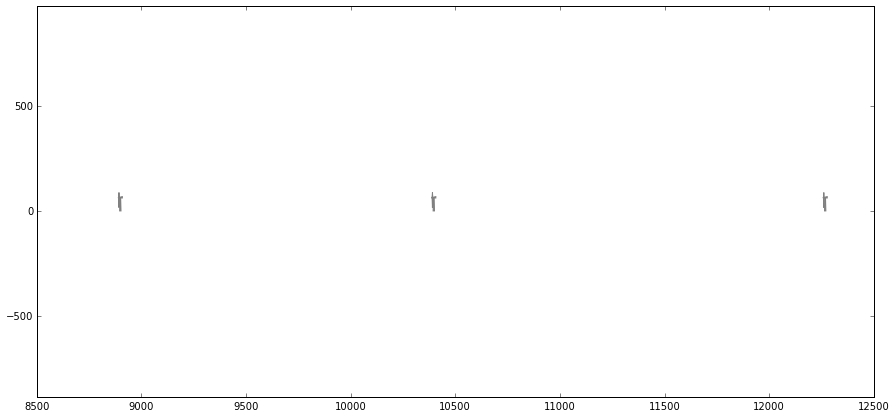

In [191]:
fig1 = pl.figure(figsize=[15, 7]);
for wt in wtl.wt_list:
    if 'H' in wt['name']:
        rel_pos = np.array(wtl['turbines']['D-01']['position']) - wt['position']
        dist = np.sqrt(rel_pos[0]**2. + rel_pos[1]**2.)
        plot_turbine(dist, wtl['turbine_types'][wt['type']], fig1)
pl.axis('equal')

#### Plotting the CT Curve

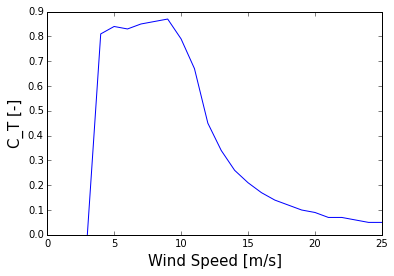

In [189]:
fs = 15
turbine = wtl['turbine_types']['SWP2.3MW']
ct = np.array(turbine['c_t_curve'])
pl.plot(ct[:,0], ct[:,1])
pl.xlabel('Wind Speed [m/s]', fontsize=fs)
pl.ylabel('C_T [-]', fontsize=fs)

#### Plotting the Power Curve

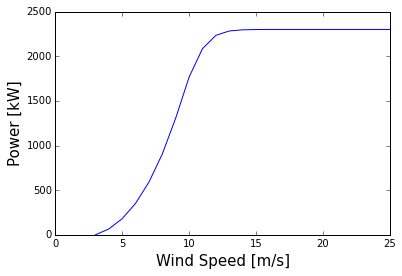

In [190]:
fs = 15
pc = np.array(turbine['power_curve'])
pl.plot(pc[:,0], pc[:,1])
pl.xlabel('Wind Speed [m/s]', fontsize=fs)
pl.ylabel('Power [kW]', fontsize=fs)